In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_excel('/content/drive/MyDrive/vois /Airbnb_Open_Data.xlsx')

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [6]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [7]:
null_count=df.isnull().sum()
print(null_count)

id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [8]:
#points to be noted
#we have 541 duplicate values.
#insufficient information in house_rules and license columns.
#dollar signs and commas recorded in service fee and price column.
#missing values in some records
#some columns have wrong datatypes.

In [9]:
#Clean the data

In [10]:
#1 Drop the duplicated records.
df.drop_duplicates(inplace=True)

In [11]:
#2 Drop house_rules and licence column with insufficient data
df.drop(['house_rules','license'],axis=1,inplace=True)

In [12]:
#3 Remove all dollar and commas in service fee and price
df['service fee'] = df['service fee'].astype(str).str.replace('$','',regex=False).str.replace(',','',regex=False)
df['price'] = df['price'].astype(str).str.replace('$','',regex=False).str.replace(',','',regex=False)

# Convert service fee and price to numeric, coercing errors
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [13]:
#4 rename the price and service fee columns to include dollar sign
df.rename(columns={'price':'$price','service fee':'$service fee'},inplace=True)

In [14]:
#5 drop all records with missing values
df.dropna(inplace=True)

In [15]:
#6 Change all mismatched data types to the aprropriate
df['$price'] = df['$price'].astype(float)
df['$service fee'] = df['$service fee'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

In [16]:
#7 correct the spelling
df.loc[df['neighbourhood group'] == 'brookln','neighbourhood group'] = 'Brooklyn'

In [17]:
#8 get rid of outliers
df=df.drop(df[df['availability 365']>500].index)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [19]:
#Step II  Exploratory data analysis

In [20]:
#summary of data
df.describe()

,lat,long,instant_bookable,Construction year,$price,$service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


In [21]:
#1.  What are different property types in given dataset
property_types = df['room type'].value_counts().to_frame()
print(property_types)

                 count
room type             
Entire home/apt  44161
Private room     37474
Shared room       1646
Hotel room         108


(0.0, 50000.0)

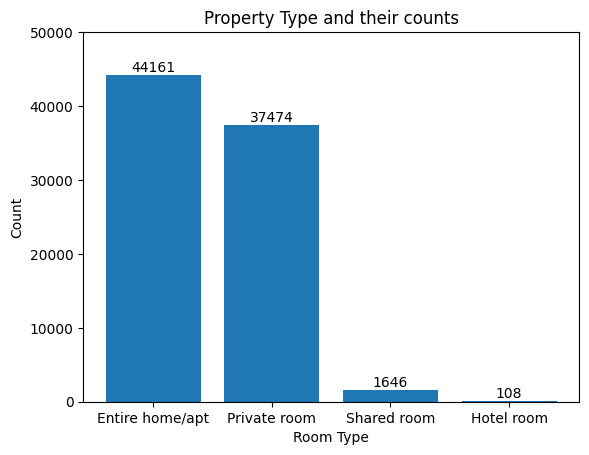

In [22]:
#Bar chart for room type
room_type_bar= plt.bar(property_types.index,property_types['count'])
plt.bar_label(room_type_bar, labels=property_types.loc[:,'count'])
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Property Type and their counts')
plt.ylim([0,50000])


# The Airbnb dataset revaels four distinct types .These categories comprise
# Entire home/apt , Private room, Shared room, and Hotel room.

# Notably, the barchart illustrates that entire room/apt dominates the dataset with 44,161 occurences,
# followed by Private rooms with 37,474 occurences.
# Shared room and Hotel room trail behind these two with 1,646 and 108 occurences respectively.

In [23]:
#2.  Which neighbourhood group has higher no. of listing
neighbourhood_group = df['neighbourhood group'].value_counts().to_frame()
print(neighbourhood_group)

                     count
neighbourhood group       
Brooklyn             34622
Manhattan            34560
Queens               11124
Bronx                 2267
Staten Island          816


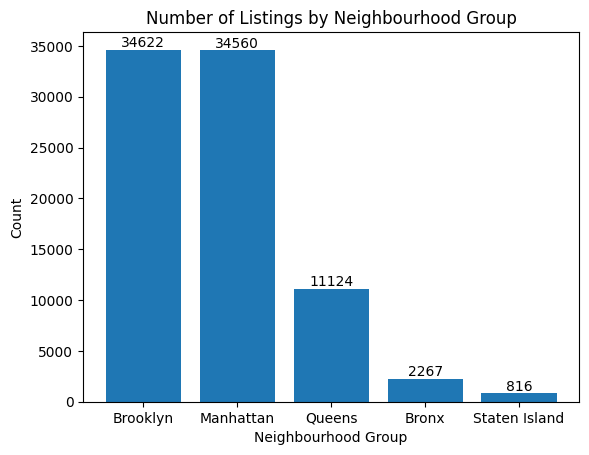

In [24]:
#bar graph
neighbourhood_group_bar= plt.bar(neighbourhood_group.index,neighbourhood_group['count'])
plt.bar_label(neighbourhood_group_bar, labels=neighbourhood_group.loc[:,'count'])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Number of Listings by Neighbourhood Group')
plt.show()

#Brooklyn has highest no. of listing among the five, followed closely by Manhattan with 34,560.

In [25]:
#3.  Which neighbourhood group has highest average prices for Airbnb listings
avg_price=df.groupby('neighbourhood group')['$price'].mean().sort_values(ascending=False).to_frame()
print(avg_price)


                         $price
neighbourhood group            
Queens               630.502517
Bronx                630.201147
Brooklyn             627.434261
Manhattan            623.435561
Staten Island        622.132353


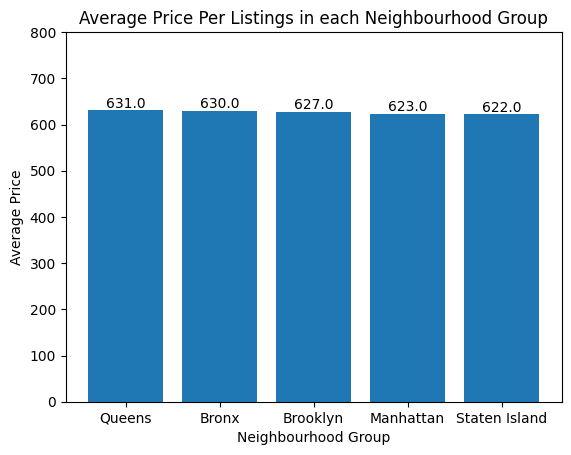

In [26]:
#Bar graph
avg_price_bar= plt.bar(avg_price.index,avg_price['$price'])
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:,'$price']))
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.ylim([0,800])
plt.title('Average Price Per Listings in each Neighbourhood Group')
plt.show()


# Among five identified neighbourhoods in a dataset, Queens has highest average listing price at 631.0 USD, closely trailed
# by the Bronx with an average listing price 630.0 USD. Conversely, Staten
# Island records the lowest average listing price 621 USD.


In [27]:
#4. Is there a relationship between the construction year of property and price
relationship = df.groupby(df['Construction year'])['$price'].mean().to_frame()
print (relationship)


                       $price
Construction year            
2003               623.394610
2004               633.108207
2005               622.162324
2006               631.194917
2007               629.062274
2008               638.469956
2009               620.700216
2010               622.412411
2011               629.740910
2012               629.047149
2013               619.097713
2014               632.114266
2015               618.360900
2016               624.664723
2017               634.077311
2018               623.589694
2019               612.362332
2020               619.689489
2021               630.490301
2022               630.201893


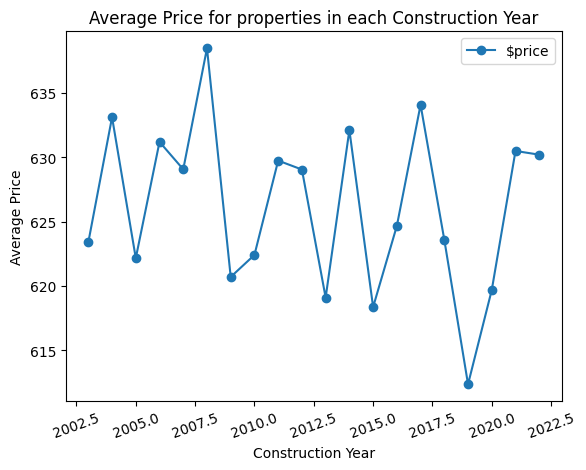

In [28]:
# Plot
relationship.plot(marker='o')
plt.xlabel('Construction Year')
plt.ylabel('Average Price')
plt.title('Average Price for properties in each Construction Year')
plt.xticks(rotation=20)
plt.show()

# The line plot depicting the construction year of prperties versus the average
# price per property reveals a noticable trend in prices as the construction years progress.
# The pattern demonstrates decreasing lows and highs ,suggesting an overall decline
# in property pieces as time progresses.

In [29]:
#5. Who are top 10 hosts by calculated host listing count

hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
print(hosts)


                   calculated host listings count
host name                                        
Sonder (NYC)                             111921.0
Karen                                     42410.0
Jeniffer                                  31447.0
Blueground                                21168.0
Kaz                                       17552.0
Corporate Housing                         14833.0
Soya                                      10260.0
Stay With Vibe                            10260.0
Kara                                      10092.0
Jeremy & Laura                            10080.0


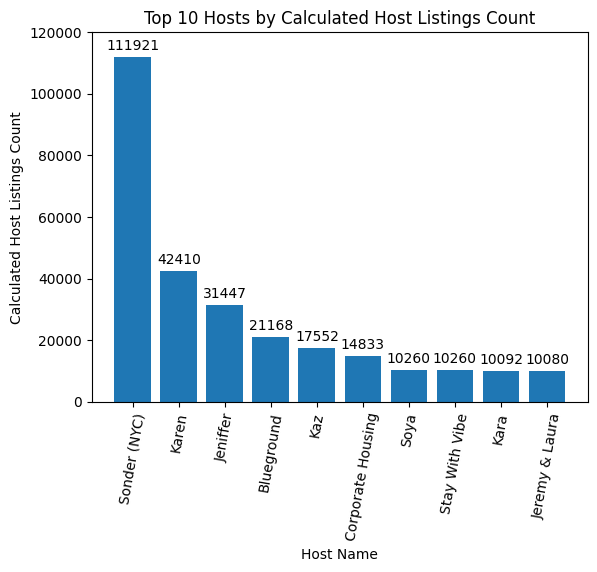

In [30]:
#Bar Graph
hosts_bar= plt.bar(hosts.index,hosts.loc[:,'calculated host listings count'])
plt.bar_label(hosts_bar, label=hosts.loc[:,'calculated host listings count'],
              label_type='edge', padding=3)
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.ylim([0,120000])
plt.xticks(rotation=80)
plt.show()



# The bar chart illustrates the top 10 hosts based on the calculated listing
# counts, with Sounder(NYC) notably leading with 111,921 listings.
# Subsequently, the other hosts follow in descending order:
#    -Karen at second position with 42410 lisitngs
#    -Jeniffer at third position with 31447 listings
#    -Blueground at fourth position with 21168 listings
#    -Kaz at fifth position with 17552 listings
#    -Corporate Housing at sixth position with 14833 listings
#    -Soya at seventh position with 10260 listings
#    -Stay with Vibe at eighth position with 10260 listings
#    -Kara at ninth position with 10092 listings
#    -Jeremy and Laura at tenth position with 10080 listings


In [31]:
#6. Are hosts with verified identities more likely to receive positive reviews
review= df.groupby('host_identity_verified')['number of reviews'].mean().sort_values(ascending=False).to_frame()
print(review)

                        number of reviews
host_identity_verified                   
unconfirmed                     32.402638
verified                        32.119902


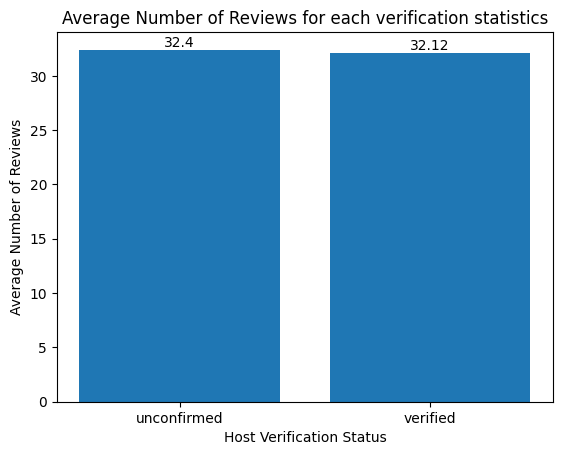

In [32]:
#bar graph
review_bar= plt.bar(review.index,review.loc[:,'number of reviews'])
plt.bar_label(review_bar, labels=round(review.loc[:,'number of reviews'],2))
plt.xlabel('Host Verification Status')
plt.ylabel('Average Number of Reviews')
plt.title('Average Number of Reviews for each verification statistics')
plt.show()

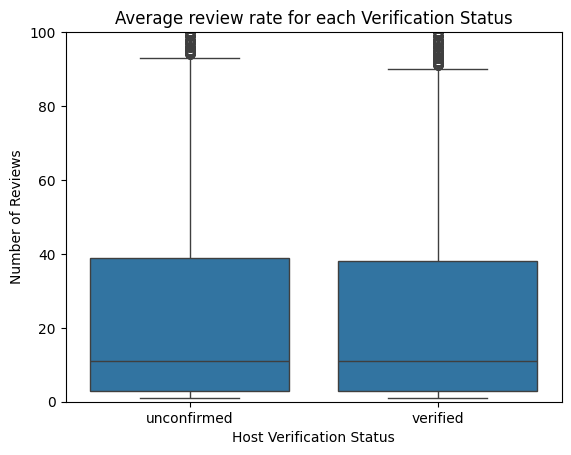

In [33]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df,x='host_identity_verified', y='number of reviews',color=base_color)
plt.xlabel('Host Verification Status')
plt.ylabel('Number of Reviews')
plt.ylim([0,100])
plt.title('Average review rate for each Verification Status')
plt.show()


#The average review rates for verified and unconfirmed are 32.11 and 32.40, respectively,
#including a marginal difference in their review rates
# with unconfirmed hosts having slightly higher rates.

In [34]:
#7. Is there a correlation between the price of lisitng and its service fees

correlation=df['$price'].corr(df['$service fee'])
print(correlation)


0.9999909082976466


Text(0.5, 1.0, 'Regression Plot showing the correlation of the Price of a Listing and its Service Fee')

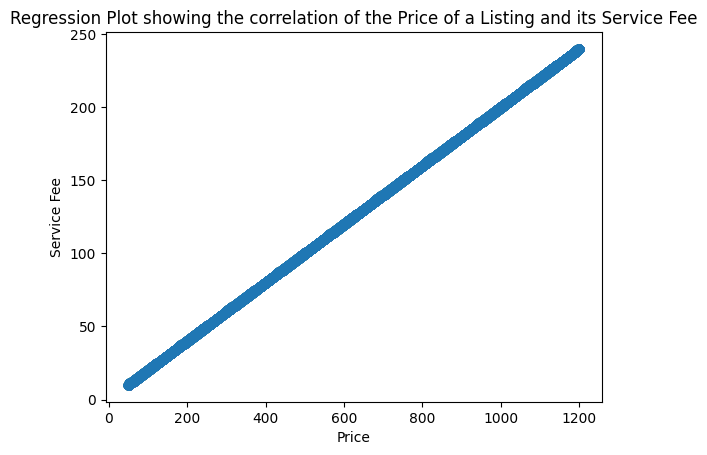

In [35]:
sns.regplot(df, x='$price',y='$service fee')
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.title('Regression Plot showing the correlation of the Price of a Listing and its Service Fee')


# The Pearson Coefficient between the prices and service fee is 0.99,
# indicating a highly robust positive correlation between these two varables.
# On the regression plot, each point forms a rising diagonal line towards the
# right, simplifying that as the price of property increases, so does its service fee.

In [36]:
# 8. What is average review rate number (e.g. stars) for listings ,and does it
# vary based on the neighbourhood group and room type
review_rate=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
print(review_rate)

                                     review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3

Text(0.5, 1.0, 'Average Review Rate for each Neighbourhood Group and Room Type')

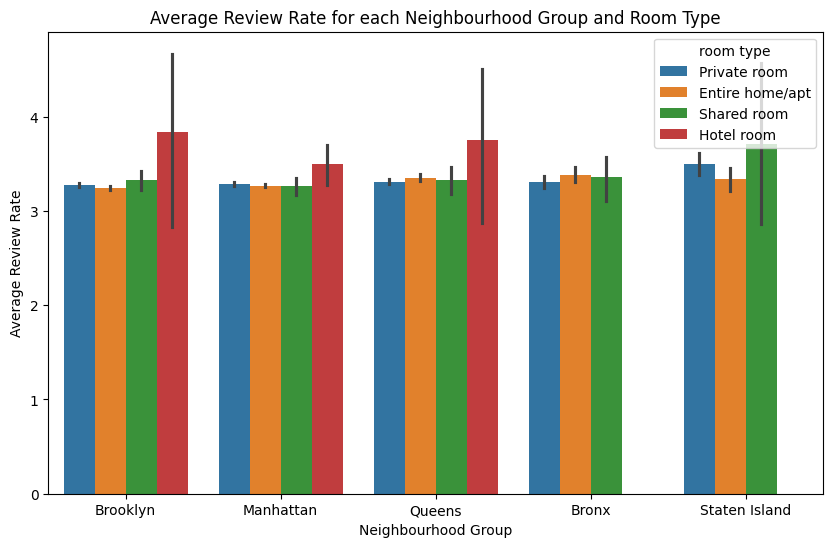

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(df,x='neighbourhood group',y='review rate number',hue='room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Neighbourhood Group and Room Type')

# Hotel rooms exhibit higher review rate as compared to all the other property types within the three neighbourhood groups
# where they are located i.e. Brooklyn, Manhattan, and Queens.

Text(0.5, 1.0, 'A Regression Plot of the Relationship Between the Calculated Host Listings Count and Availability')

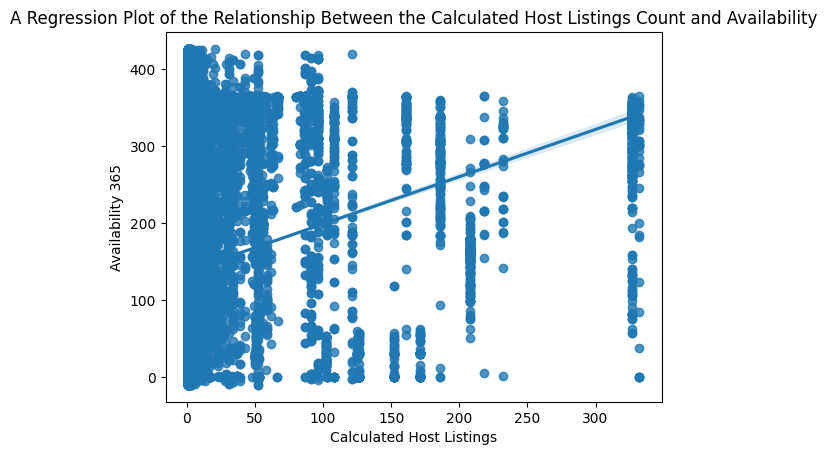

In [38]:
#9. Are hosts with higher caculated host listings count more likely to maintain higher availability throughout the year
sns.regplot(df,x='calculated host listings count',y='availability 365')
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability 365')
plt.title('A Regression Plot of the Relationship Between the Calculated Host Listings Count and Availability')


In [39]:
df['calculated host listings count'].corr(df['availability 365'])

# The Pesrson correlation coefficient for the association between calculated host
# listings and availability 365 is 0.136, indicating a weak positive correlation
# between the two variables.


np.float64(0.1359971471570339)

In [40]:
# CONCLUSION
# This project has provided a comphrehensive analysis of the NYC Airbnb dataset, shedding light on various aspects of the
# short- term lodging market. Through data wrangling , Exploratory Data Analysis (EDA),and interpretation of summary statistics , we have uncovered
# valueble insights into listing distribution , pricing ,dynamics , host and review analysis.

# Key findings include the dominance in counts of entire home/apt listings , the variability in listing counts across neighbourhood groups,
# and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified hosts status on the
# review rates , as well as strong correalation between listing price and service fee.

# Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences
# could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modelling
# techniques , such  as regression or machine learning alorithms, could enable forecasting of listing demand, pricing trends , and
# customer behavior , facilitating strategic decision-making for stakeholders in the short-term loding industry.